In [1]:
import kornia
import torch
import matplotlib.pyplot as plt

In [87]:
def get_position(size, dim, device, batch_size):
    '''
    这个函数的作用是生成位置张量，用于表示图像上每个像素的位置信息。
    函数的执行过程如下：
    从 size 中获取图像的高度和宽度，并计算宽高比（aspect ratio）。
    使用 kornia.utils.create_meshgrid 函数生成一个网格矩阵，表示图像上每个像素的坐标位置。这个网格矩阵的形状是 (height, width, 2)，其中最后一个维度表示 x 和 y 坐标。
    对生成的网格矩阵进行一些处理。首先，将 y 坐标进行翻转，即乘以宽高比并取负值，以适应图像坐标系。然后，根据 dim 的值进行不同的处理。
    如果 dim 等于 1，表示生成一维位置张量，则只保留 x 坐标部分，将位置张量的形状变为 (batch_size, 1, height, width)。
    如果 dim 等于 3，表示生成三维位置张量，则需要在 x、y、z 坐标之间进行调换，并为 z 坐标赋予随机值，取值范围为 [-1, 1]。最后将 x、y、z 三个坐标合并，得到形状为 (batch_size, 3, height, width) 的位置张量。
    将生成的位置张量进行扩展，使其形状变为 (batch_size, dim, height, width)，其中 batch_size 是批量大小，dim 是位置张量的维度。

    这个函数的作用是为每个像素生成一个位置张量，该张量可以用于在图像处理或计算机视觉任务中，与其他特征进行融合或参考。位置张量可以提供图像上像素的空间信息，对于某些任务（如姿态估计、光流估计等）非常有用。
    return batch_size, dim, height, width
    '''
    height, width = size
    aspect_ratio = width / height
    position = kornia.utils.create_meshgrid(height, width, device=torch.device(device)).permute(0, 3, 1, 2) #[1, 2, 256, 256]

    position[:, 1] = -position[:, 1] * aspect_ratio  # flip y axis

    if dim == 1:
        x, y = torch.split(position, 1, dim=1)
        position = x
    if dim == 3:

        x, y = torch.split(position, 1, dim=1)  #[1, 1, 256, 256]
        z = torch.ones_like(x) * torch.rand(1, device=device) * 2 - 1 #[1, 1, 256, 256]
        a = torch.randint(0, 3, (1,)).item()
        if a == 0:
            xyz = [x, y, z]
        elif a == 1:
            xyz = [z, x, y]
        else:
            xyz = [x, z, y]
        xyz = [x, y, z]
        position = torch.cat(xyz, dim=1)  #[1, 3, 256, 256]

    position = position.expand(batch_size, dim, height, width)

    return position

In [102]:
p = get_position((5, 5), 3, 'cpu', 1)[0,1].numpy()
print(p)
print(p.shape)

[[ 1.   1.   1.   1.   1. ]
 [ 0.5  0.5  0.5  0.5  0.5]
 [-0.  -0.  -0.  -0.  -0. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [-1.  -1.  -1.  -1.  -1. ]]
(5, 5)


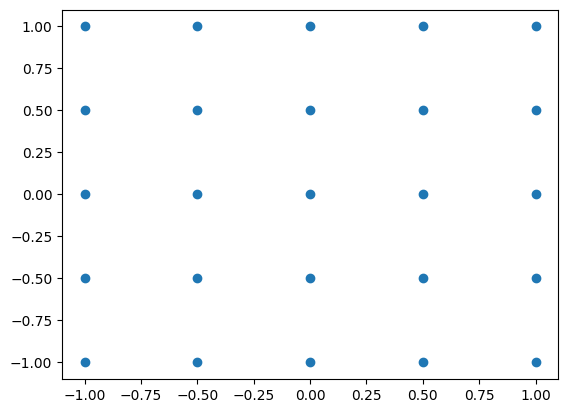

In [112]:
p = kornia.utils.create_meshgrid(5,5)[0].permute(2,0,1).numpy()
plt.scatter(p[0], p[1])

In [60]:
_,xyz1 = get_position((256, 256), 3, 'cpu', 1)
_,xyz2 = get_position((256, 256), 3, 'cpu', 1)

In [61]:
xyz1[0]-xyz1[1]

tensor([[[[ 1.2064,  1.1985,  1.1907,  ..., -0.7779, -0.7858, -0.7936],
          [ 1.2064,  1.1985,  1.1907,  ..., -0.7779, -0.7858, -0.7936],
          [ 1.2064,  1.1985,  1.1907,  ..., -0.7779, -0.7858, -0.7936],
          ...,
          [ 1.2064,  1.1985,  1.1907,  ..., -0.7779, -0.7858, -0.7936],
          [ 1.2064,  1.1985,  1.1907,  ..., -0.7779, -0.7858, -0.7936],
          [ 1.2064,  1.1985,  1.1907,  ..., -0.7779, -0.7858, -0.7936]]]])

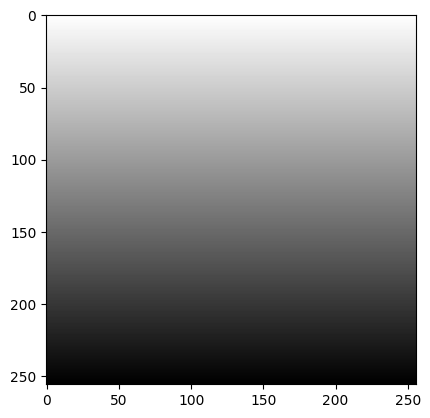

In [36]:
tmp = position_stripe[0,2,].detach().numpy()
plt.imshow(tmp,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 256, 256])


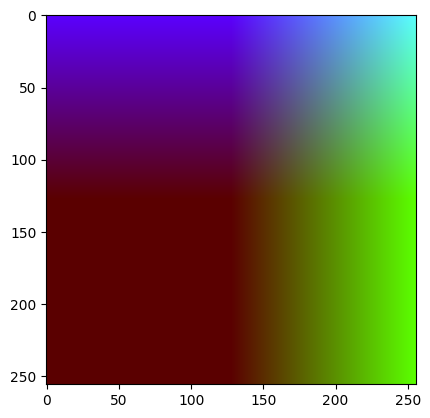

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


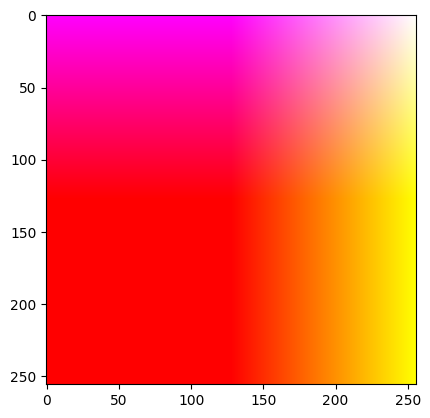

In [7]:
position_stripe = get_position((256, 256), 3, 'cpu', 1) # (batch_size, dim, height, width)
plt.imshow(position_stripe[0].permute(1, 2, 0).detach().numpy())
plt.show()
tmp=torch.cat([position_stripe[:, 0:1] + 2.0, position_stripe[:, 1:]], dim=1)
plt.imshow(tmp[0].permute(1, 2, 0).detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


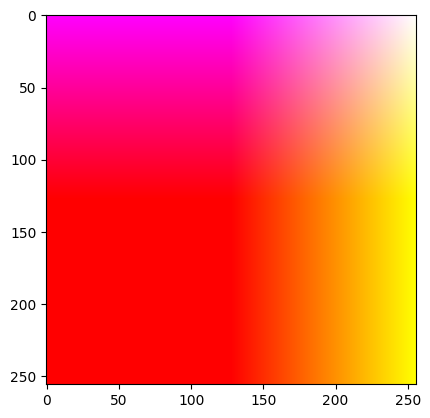

In [6]:
position_stripe[:, 0:1] += 2.0

plt.imshow(position_stripe[0].permute(1, 2, 0).detach().numpy())